# Stage 4

- has **`location_raw`**: True
- vars one-hot encoded: False
- var label-encoded: True
- oversampled: True

In [1]:
from datetime import datetime
import pickle

from sklearn.model_selection import RandomizedSearchCV, train_test_split
import humanize
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload

In [2]:
features = pickle.load(open('./data/stage4-l_encoded-oversampled.pkl', 'rb'))
labels = features.pop('stop_outcome')

In [3]:
# Take out 5% of data for final final testing; shuffle first
lop_off_pct = .05
lop_off_idx = round(features.shape[0] * lop_off_pct)
print('lop_off_idx = {}'.format(lop_off_idx))

final_test_features = features[:lop_off_idx]
final_test_outcomes = labels[:lop_off_idx]

features = features[lop_off_idx:]
labels = labels[lop_off_idx:]

lop_off_idx = 50452


In [4]:
# Split the 'features' and 'labels' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=0)


# Simple Linear Classifier

In [5]:
from sklearn import linear_model

clf_sgd = linear_model.SGDClassifier()
clf_sgd.fit(X_train, y_train)
clf_sgd.score(X_test, y_test)

0.3378990194032965

# VotingClassifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_jobs=8, verbose=3, random_state=0)
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier(random_state=0)
clf4 = GradientBoostingClassifier(verbose=3, random_state=0)

eclf = VotingClassifier(estimators=[('rf', clf1), ('gnb', clf2), ('dt', clf3), ('gb', clf4)],
                        voting='soft')
eclf = eclf.fit(X_train, y_train)
print('eclf score: {}'.format(eclf.score(X_test, y_test)))

building tree 1 of 10
building tree 2 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10






building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    2.4s remaining:    5.8s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    2.6s remaining:    1.1s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    3.7s finished


      Iter       Train Loss   Remaining Time 
         1     1187900.7108            6.46m
         2     1152995.9413            6.43m
         3     1124551.9853            6.37m
         4     1101427.0958            6.30m
         5     1082203.7407            6.23m
         6     1066006.8552            6.17m
         7     1052415.2320            6.10m
         8     1040518.8799            6.03m
         9     1030610.1183            5.94m
        10     1021594.6732            5.87m
        11     1014262.3764            5.78m
        12     1007610.3982            5.72m
        13     1001957.0192            5.64m
        14      996821.0877            5.57m
        15      992076.4098            5.50m
        16      988206.6664            5.44m
        17      984871.8128            5.36m
        18      981818.2121            5.28m
        19      978691.7189            5.21m
        20      976324.8110            5.13m
        21      973820.5017            5.06m
        2

[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished


eclf score: 0.9291571041101606


D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
eclf.estimators_

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=10, n_jobs=8, oob_score=False, random_state=0,
             verbose=3, warm_start=False),
 GaussianNB(priors=None),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_split=1e-07, min_samples_leaf=1,
               min_samples_

# GaussianNB

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('{}'.format(gnb.score(X_test, y_test)))

0.37561026496974753


# DecisionTreeClassifier

In [9]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
print('{}'.format(dtc.score(X_test, y_test)))

0.9171343626121428


# RandomForestClassifier

In [10]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print('{}'.format(rfc.score(X_test, y_test)))

0.9266430210723973


# GradientBoostingClassifier

In [11]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
print('{}'.format(gbc.score(X_test, y_test)))

0.5134884206133945


## GradientBoostingClassifier (Tuned)


In [12]:
gbc_tuned = GradientBoostingClassifier(
    learning_rate=0.0983,
    max_depth=6,
    max_features=len(list(X_train.columns.values)),
    subsample=0.9,
    verbose=3,
    random_state=0,
)
gbc_tuned.fit(X_train, y_train)
print('{}'.format(gbc_tuned.score(X_test, y_test)))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     1060718.7142        5483.9738           18.87m
         2     1023406.7530        4154.9098           18.65m
         3      993750.0567        3279.4409           18.41m
         4      969674.1077        2633.1252           18.14m
         5      949954.0988        2251.2836           18.00m
         6      933092.3104        1862.7866           17.78m
         7      918762.2123        1547.0532           17.62m
         8      905864.4375        1418.3274           17.46m
         9      894845.1320        1231.1475           17.31m
        10      885371.7876        1026.6359           17.16m
        11      877584.1297         871.0142           17.01m
        12      870845.0213         744.4410           16.83m
        13      864690.8080         649.4040           16.66m
        14      858987.1990         623.7105           16.50m
        15      853412.0273         590.1140           16.33m
       

# XGBoost

In [13]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
# matplotlib.use('Agg')
from matplotlib import pyplot


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

le_outcomes = LabelEncoder()


In [15]:
xg_train = xgb.DMatrix(X_train.values, label=le_outcomes.fit_transform(y_train))
xg_test = xgb.DMatrix(X_test.values, label=le_outcomes.fit_transform(y_test))
xg_test_2 = xgb.DMatrix(final_test_features.values, label=le_outcomes.fit_transform(final_test_outcomes))

In [16]:
params = {
    'objective': 'multi:softmax',
    'learning_rate': 0.0983,
    'max_depth': 19,
    'silent': 0,
    'nthread': 8,
#     'num_class': 45,
#     'predictor': 'gpu_predictor',
#     'max_bin': 512,
    'tree_method': 'gpu_hist',
#     'alpha': 0.8,
#     'gamma': 10.0,
    'subsample': 0.9,
#     'lambda': 0.9,,
#     'colsample_bytree': 0.9,
#     'colsample_bylevel': 0.3,
#     'scale_pos_weight': 0.1,
#     'updater': 'grow_histmaker,refresh,prune',
#     'grow_policy': 'lossguide',
#     'max_leaves': 20000,
#     'max_bin': 1024,
#     'base_score': 1.0,
#     'eval_metric': 'merror',
#     'max_delta_step': 8,
}

params['num_class'] = len(list(X_train.columns.values))


In [17]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 10000
# num_round = 5

bst = xgb.train(params=params, dtrain=xg_train, num_boost_round=num_round, evals=watchlist, early_stopping_rounds=50)
# bst = xgb.train(params=params, dtrain=xg_train, num_boost_round=num_round, evals=watchlist)

[0]	train-merror:0.336579	test-merror:0.355054
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 50 rounds.
[1]	train-merror:0.291634	test-merror:0.313833
[2]	train-merror:0.267108	test-merror:0.291352
[3]	train-merror:0.250459	test-merror:0.27621
[4]	train-merror:0.237941	test-merror:0.263953
[5]	train-merror:0.223942	test-merror:0.252321
[6]	train-merror:0.21321	test-merror:0.242484
[7]	train-merror:0.204757	test-merror:0.235802
[8]	train-merror:0.197341	test-merror:0.228615
[9]	train-merror:0.190732	test-merror:0.222861
[10]	train-merror:0.185446	test-merror:0.21811
[11]	train-merror:0.179793	test-merror:0.213259
[12]	train-merror:0.174515	test-merror:0.208528
[13]	train-merror:0.170312	test-merror:0.2046
[14]	train-merror:0.166531	test-merror:0.201273
[15]	train-merror:0.162942	test-merror:0.198242
[16]	train-merror:0.160233	test-merror:0.19553
[17]	train-merror:0.157525	test-merror:0.193324
[18]	

In [18]:
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
pickle.dump(bst, open('./model-xgboost-{}.pkl'.format(timestamp), 'wb'))

In [19]:
pred = bst.predict(xg_test)

In [22]:
error_rate = np.sum(pred != le_outcomes.fit_transform(y_test)) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))

Test error using softmax = 0.06216357187565199


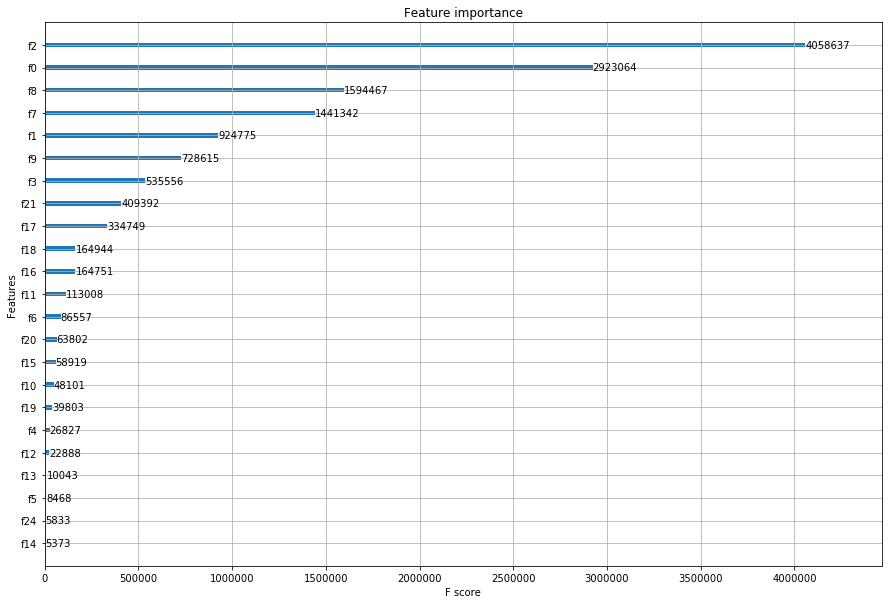

In [24]:
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(15, 10)

In [25]:
for idx, c in enumerate(X_train.columns.values):
    print('{}: {}'.format(idx, c))

0: location_raw
1: county_name
2: driver_age_raw
3: driver_race
4: search_conducted
5: contraband_found
6: stop_duration
7: day_period
8: season
9: is_male
10: violation_bad_stop
11: violation_cell_phone
12: violation_display_of_plates
13: violation_equipment
14: violation_license
15: violation_lights
16: violation_moving_violation
17: violation_other
18: violation_registration
19: violation_safe_movement
20: violation_seatbelt
21: violation_speeding
22: violation_suspended_license
23: violation_traffic_control_signal
24: violation_window_tint


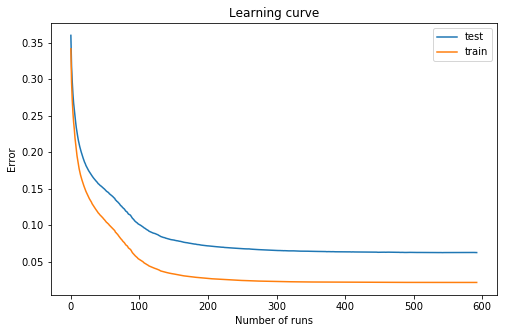

In [26]:
error_results = {
    'train': [],
    'test': [],
}

logfile = 'runs/201805111748-oversampled-0.0626-error-592-run.log'
with open(logfile, 'r') as f:
    for line in f:
        tokens = line.strip().split('\t')
        error_results['train'].append(float(tokens[1].split(':')[1]))
        error_results['test'].append(float(tokens[2].split(':')[1]))

df_errors = pd.DataFrame(error_results)

learning_curve = df_errors.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Error')

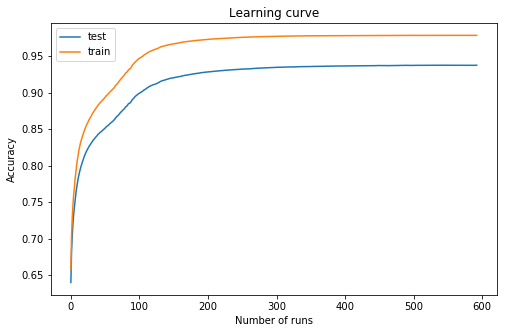

In [27]:
df_accuracy = df_errors.copy()
df_accuracy_processed = df_accuracy.mul(-1).add(1)

learning_curve = df_accuracy_processed.plot.line(title='Learning curve', figsize=(8,5))
learning_curve.set_xlabel('Number of runs')
learning_curve.set_ylabel('Accuracy')

# RandomSearchCV

In [ ]:
params_rfc = {
#     'class_weight': None,
    'n_estimators': [10, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 19],
    'max_features': [None, 'sqrt', 'log2'],
#     'min_impurity_split': [0.0000001],

#     'min_samples_split': [2, 5, 10], 
#     'min_samples_leaf':[1, 2, 4],

#     'min_weight_fraction_leaf': [0],

#     'max_leaf_nodes': [None, 100, 1000, 2000],
    'n_jobs': [8],
    'random_state': [0],
    'verbose': [3],
}

rfc = RandomForestClassifier()

clf = RandomizedSearchCV(rfc, params_rfc, scoring='accuracy', n_jobs=8, cv=5, verbose=3)
clf.fit(X_train, y_train)

timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
pickle.dump(clf, open('{}-randomforestclassifier-clf.pkl'.format(timestamp), 'wb'))